In [ ]:
!pip install fuzzy_c_means

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.1
    Uninstalling pydantic-2.6.1:
      Successfully uninstalled pydantic-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed

In [ ]:
!pip install scipy

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.20.1 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from fcmeans import FCM
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error , precision_score,accuracy_score,f1_score,recall_score
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
# load your data
data = pd.read_csv("heart.csv")
data.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


In [ ]:
# Preprocess the data
data.replace('?',-99999, inplace=True)
print(data.axes)

[RangeIndex(start=0, stop=1025, step=1), Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')]


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Let explore the dataset and do a few visualizations
print(data.loc[10])

age          71.0
sex           0.0
cp            0.0
trestbps    112.0
chol        149.0
fbs           0.0
restecg       1.0
thalach     125.0
exang         0.0
oldpeak       1.6
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 10, dtype: float64


In [ ]:
data['target'].unique()

array([0, 1])

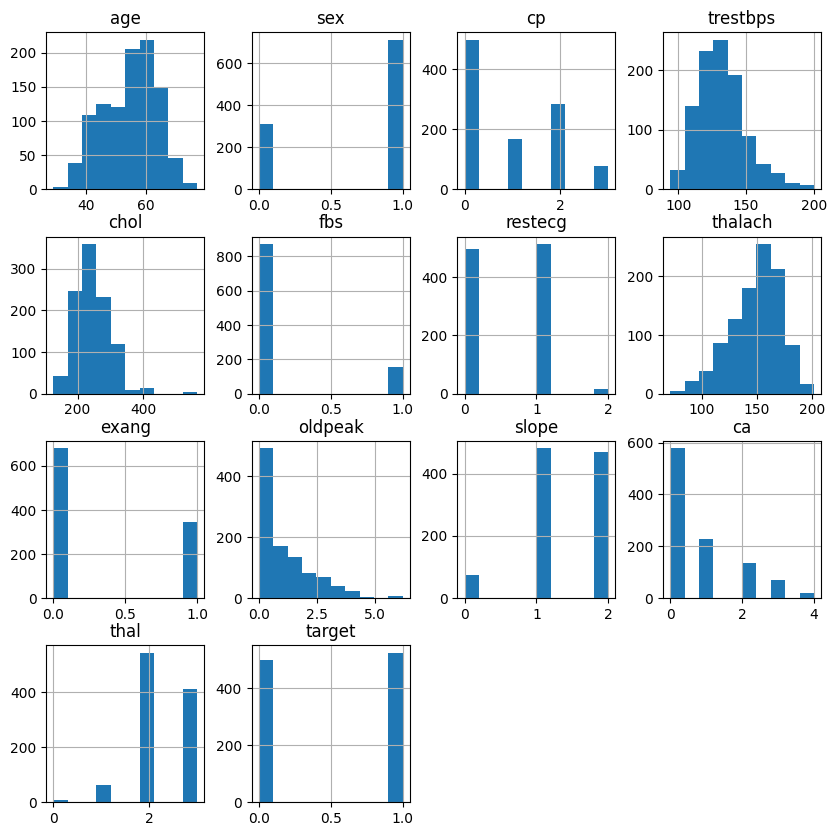

In [ ]:
# Plot histograms for each variable
data.hist(figsize = (10, 10))
plt.show()

In [ ]:
# Describe the dataset
print(data.describe())
print(data.info())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

<Axes: >

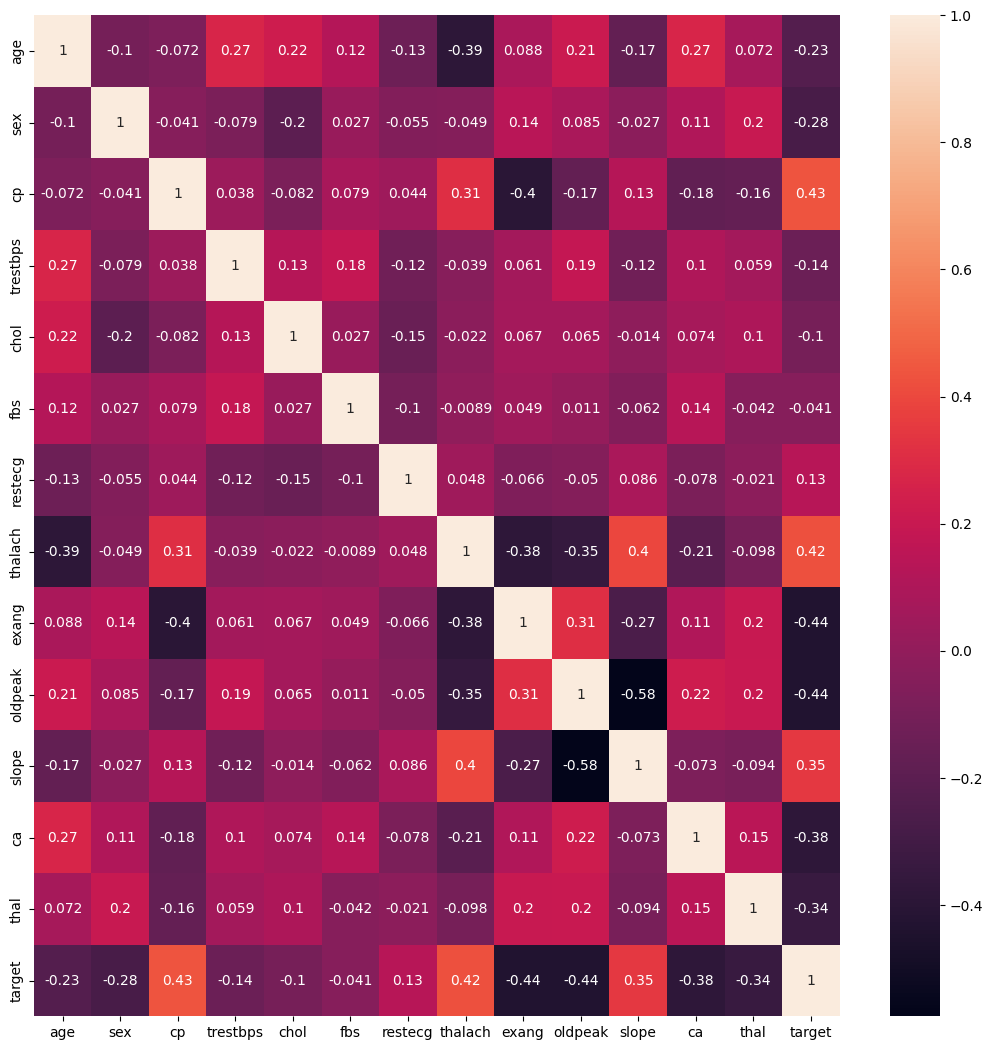

In [ ]:
#plt.figure(figsize=(100,81))
#sns.pairplot(data,palette="Set2",kind='hist')
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),annot=True)

In [ ]:
X = data.drop("target", axis=1)
y = data["target"]

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#Decision Tree Classifier
DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(X_train_std,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
regressor = GradientBoostingClassifier(
    max_depth=3,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

errors = [mean_squared_error(y_test,y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

GBDT_best_regressor = GradientBoostingClassifier(
    max_depth =3 ,
    n_estimators=best_n_estimators,
    learning_rate = 1.0
)
GBDT_best_regressor.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=1.0, n_estimators=2)

In [ ]:
# Bagging
gbdt = GradientBoostingClassifier()
Bag_GBDT = BaggingClassifier(base_estimator=gbdt, n_estimators=5, max_samples=0.8)
Bag_GBDT.fit(X_train, y_train)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
df_tk=data
def lower_limit(data):
  col = data.columns
  data_lower_limit = []
  for i in col:
    df = data[i]
    x = (1*df[0] + 1*df[1] + 2*df[2] + 3*df[3] + 4*df[4]) / sum(df)
    data_lower_limit.append(x)
  return(data_lower_limit)

def middle_value(data):
  col = data.columns
  data_middle_value = []
  for i in col:
    df = data[i]
    x = (1*df[0] + 2*df[1] + 3*df[2] + 4*df[3] + 5*df[4]) / sum(df)
    data_middle_value.append(x)
  return(data_middle_value)

def upper_limit(data):
  col = data.columns
  data_upper_limit = []
  for i in col:
    df = data[i]
    x = (2*df[0] + 3*df[1] + 4*df[2] + 5*df[3] + 5*df[4]) / sum(df)
    data_upper_limit.append(x)
  return(data_upper_limit)

def fuzzi_work(data):
  clower_limit = lower_limit(data)
  dmiddle_value = middle_value(data)
  eupper_limit = upper_limit(data)
  df = pd.DataFrame(list(zip(clower_limit, dmiddle_value, eupper_limit)),columns =['batas bawah', 'nilai tengah', 'batas atas'])
  return(df)

In [ ]:
fuzz_tk = fuzzi_work(df_tk)

In [ ]:
regressor = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

errors = [mean_squared_error(y_test,y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

Fuzzy_best_regressor = GradientBoostingClassifier(
    max_depth =2 ,
    n_estimators=best_n_estimators,
    learning_rate = 0.5
)
Fuzzy_best_regressor.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=2)

In [ ]:
regressor = GradientBoostingClassifier(
    max_depth=5,
    n_estimators=2,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

errors = [mean_squared_error(y_test,y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

best_regressor = GradientBoostingClassifier(
    max_depth =5,
    n_estimators=best_n_estimators,
    learning_rate = 1.0
)
best_regressor.fit(X_train,y_train)

Bag_Fuzzy_GBDT = BaggingClassifier(
    base_estimator= best_regressor,
    n_estimators=100,
    max_samples = 0.8,
    bootstrap=True,
    oob_score = True,
    random_state = 0
)
Bag_Fuzzy_GBDT.fit(X_train,y_train)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
#Fuzzy-C-Means Clustering
fcm = FCM(n_clusters=8)
fcm.fit(X_train_std)
FX_train = fcm.predict(X_train_std)
FX_test = fcm.predict(X_test_std)
FX_train= FX_train.reshape(-1, 1)
FX_test = FX_test.reshape(-1, 1)

# Bagging
gbdt = GradientBoostingClassifier()
bag_fcm_gbdt = BaggingClassifier(base_estimator=gbdt, n_estimators=10, max_samples=0.8)
bag_fcm_gbdt.fit(FX_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=GradientBoostingClassifier(), max_samples=0.8)

In [ ]:
# Predict
DT_y_pred = DT_model.predict(X_test_std)
print(DT_y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
GBDT_y_pred = GBDT_best_regressor.predict(X_test)
print(GBDT_y_pred)

[0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 1]


In [ ]:
# Predict
Bag_GBDT_y_pred = Bag_GBDT.predict(X_test)
print(Bag_GBDT_y_pred)

[0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1
 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 1]


In [ ]:
Fuzzy_GBDT_y_pred = Fuzzy_best_regressor.predict(X_test)
print(Fuzzy_GBDT_y_pred)

[0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 1]


In [ ]:
Bag_Fuzzy_GBDT_y_pred = Bag_Fuzzy_GBDT.predict(X_test)
print(Bag_Fuzzy_GBDT_y_pred)

[0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1
 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 1]


In [ ]:
# Predict
bag_fcm_gbdt_y_pred = bag_fcm_gbdt.predict(FX_test)
print(bag_fcm_gbdt_y_pred)

[0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1
 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1
 1 1 0 0 0 1]


In [ ]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in y_test:
    print ('%-25s %-25s' % (label, bag_fcm_gbdt_y_pred[i]), end="")
    if (label == bag_fcm_gbdt_y_pred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, bag_fcm_gbdt_y_pred))
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(y_test, bag_fcm_gbdt_y_pred))
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test, bag_fcm_gbdt_y_pred))
print ("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
0                         0                         Correct                  
1                         0                         Wrong                    
0                         1                         Wrong                    
0                         1                         Wrong                    
1                         1                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
1                         0                         Wrong                    
1                         0                         Wrong                    
0                         0                         Correct            

In [ ]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in y_test:
    print ('%-25s %-25s' % (label, DT_y_pred[i]), end="")
    if (label == DT_y_pred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, DT_y_pred))
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(y_test, DT_y_pred))
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,DT_y_pred))
print ("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct            

In [ ]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in y_test:
    print ('%-25s %-25s' % (label, GBDT_y_pred[i]), end="")
    if (label == GBDT_y_pred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, GBDT_y_pred))
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(y_test, GBDT_y_pred))
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test, GBDT_y_pred))
print ("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
0                         0                         Correct                  
1                         0                         Wrong                    
0                         1                         Wrong                    
0                         1                         Wrong                    
1                         1                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
1                         0                         Wrong                    
1                         0                         Wrong                    
0                         1                         Wrong              

In [ ]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in y_test:
    print ('%-25s %-25s' % (label, Bag_GBDT_y_pred[i]), end="")
    if (label == Bag_GBDT_y_pred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, Bag_GBDT_y_pred))
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(y_test, Bag_GBDT_y_pred))
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test, Bag_GBDT_y_pred))
print ("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
0                         0                         Correct                  
1                         0                         Wrong                    
0                         1                         Wrong                    
0                         0                         Correct                  
1                         1                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
1                         1                         Correct                  
1                         0                         Wrong                    
0                         0                         Correct            

In [ ]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in y_test:
    print ('%-25s %-25s' % (label, Fuzzy_GBDT_y_pred[i]), end="")
    if (label == Fuzzy_GBDT_y_pred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, Fuzzy_GBDT_y_pred))
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(y_test, Fuzzy_GBDT_y_pred))
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test, Fuzzy_GBDT_y_pred))
print ("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
0                         0                         Correct                  
1                         0                         Wrong                    
0                         1                         Wrong                    
0                         1                         Wrong                    
1                         1                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
1                         0                         Wrong                    
1                         0                         Wrong                    
0                         0                         Correct            

In [ ]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in y_test:
    print ('%-25s %-25s' % (label, Bag_Fuzzy_GBDT_y_pred[i]), end="")
    if (label == Bag_Fuzzy_GBDT_y_pred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, Bag_Fuzzy_GBDT_y_pred))
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(y_test, Bag_Fuzzy_GBDT_y_pred))
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,Bag_Fuzzy_GBDT_y_pred))
print ("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
0                         0                         Correct                  
1                         0                         Wrong                    
0                         1                         Wrong                    
0                         0                         Correct                  
1                         1                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
1                         1                         Correct                  
1                         0                         Wrong                    
0                         1                         Wrong              

In [ ]:
# Calculate the bias error
DT_bias_error = 1 - accuracy_score(y_test, DT_y_pred)

# Calculate the variance error
DT_y_pred_train = DT_model.predict(X_train)
DT_variance_error = accuracy_score(y_train, DT_y_pred_train) - accuracy_score(y_test, DT_y_pred)

print("Bias error: ", DT_bias_error)
print("Variance error: ", DT_variance_error)

Bias error:  0.16814159292035402
Variance error:  -0.1350654041641941


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Calculate the bias error
GBDT_bias_error = 1 - accuracy_score(y_test, GBDT_y_pred)

# Calculate the variance error
GBDT_y_pred_train = GBDT_best_regressor.predict(X_train)
GBDT_variance_error = accuracy_score(y_train, GBDT_y_pred_train) - accuracy_score(y_test, GBDT_y_pred)

print("Bias error: ", GBDT_bias_error)
print("Variance error: ", GBDT_variance_error)

Bias error:  0.16519174041297935
Variance error:  0.05294684245379566


In [ ]:
# Calculate the bias error
Bag_GBDT_bias_error = 1 - accuracy_score(y_test, Bag_GBDT_y_pred)

# Calculate the variance error
Bag_GBDT_y_pred_train = Bag_GBDT.predict(X_train)
Bag_GBDT_variance_error = accuracy_score(y_train, Bag_GBDT_y_pred_train) - accuracy_score(y_test, Bag_GBDT_y_pred)

print("Bias error: ", Bag_GBDT_bias_error)
print("Variance error: ", Bag_GBDT_variance_error)

Bias error:  0.0471976401179941
Variance error:  0.03845128443286294


In [ ]:
# Calculate the bias error
Fuzzy_GBDT_bias_error = 1 - accuracy_score(y_test, Fuzzy_GBDT_y_pred)

# Calculate the variance error
Fuzzy_GBDT_y_pred_train = Fuzzy_best_regressor.predict(X_train)
Fuzzy_GBDT_variance_error = accuracy_score(y_train, DT_y_pred_train) - accuracy_score(y_test, Fuzzy_GBDT_y_pred)

print("Bias error: ", Fuzzy_GBDT_bias_error)
print("Variance error: ", Fuzzy_GBDT_variance_error)

Bias error:  0.2566371681415929
Variance error:  -0.04656982894295525


In [ ]:
# Calculate the bias error
Bag_Fuzzy_GBDT_bias_error = 1 - accuracy_score(y_test, Bag_Fuzzy_GBDT_y_pred)

# Calculate the variance error
Bag_Fuzzy_GBDT_y_pred_train = Bag_Fuzzy_GBDT.predict(X_train)
Bag_Fuzzy_GBDT_variance_error = accuracy_score(y_train, Bag_Fuzzy_GBDT_y_pred_train) - accuracy_score(y_test, Bag_Fuzzy_GBDT_y_pred)

print("Bias error: ", Bag_Fuzzy_GBDT_bias_error)
print("Variance error: ", Bag_Fuzzy_GBDT_variance_error)


Bias error:  0.10029498525073743
Variance error:  0.056563206825081425
